# SPRESENSE-CommonSense Sensor Fusion
### Data pre-preparation
[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mjrovai/Sony-Spresense/blob/main/notebooks/Spresence-CommonSense/data_preparation.ipynb)
 - By Marcelo Rovai

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (10,5)

## Functions

In [ ]:
 def load_data(file_name):
    df = pd.read_csv('./data/'+file_name+'.csv')
    print (file_name+' - Shape: '+str(df.shape))
    return df

In [ ]:
 def plot_data(df, title):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 6))
    axes[0, 0].plot(df['pres'])
    axes[0, 0].set_title('pres')
    axes[0, 1].plot(df['temp'])
    axes[0, 1].set_title('temp')
    axes[1, 0].plot(df['humi'])
    axes[1, 0].set_title('humi')
    axes[1, 1].plot(df['voc'])
    axes[1, 1].set_title('voc')
    axes[2, 0].plot(df['red'])
    axes[2, 0].set_title('red')
    axes[2, 1].plot(df['green'])
    axes[2, 1].set_title('green')
    axes[3, 0].plot(df['blue'])
    axes[3, 0].set_title('blue')
    axes[3, 1].plot(df['ir'])
    axes[3, 1].set_title('ir')
    plt.tight_layout()
    plt.suptitle('CommonSense Sensors - '+title, fontsize=16, y=1.02)

    plt.show()

In [ ]:
def plot_pairplot(df, title):
    sns.pairplot(df)
    plt.suptitle('Pairplot of Variables - '+title, fontsize=18, y=1.02)
    #plt.subplots_adjust(top=0.9)
    plt.show()

In [ ]:
def normalize_train_data(df):
    """
    Normalizes the numerical features of a dataset and returns a tuple containing three elements:
        1.The normalized data
        2. A list of the mins of each column.
        3. A list of the ranges of each column.
    """
    mins=[]
    ranges=[]
    # get numerical features
    df_scaled = df.iloc[:, :-1]

    # apply normalization
    for column in df_scaled.columns:
        min = df_scaled[column].min()
        range = (df_scaled[column].max() - min)
        df_scaled[column] = (df_scaled[column] - min) / range

        # Collect min and range values
        mins.append(min)
        ranges.append(range)

    # Combine the normalized features and output into a new dataframe
    df_scaled['class'] =  df['class']

    return df_scaled, mins, ranges

In [ ]:
def normalize_test_data(df, mins, ranges):
    # Select the numerical columns to be standardized
    numerical_cols = df.columns[0:-1]

    # normalizeize the numerical columns
    df[numerical_cols] = (df[numerical_cols] - mins) / ranges

    return df

## Download, analyse and clean Raw Data

- Open the Files Manager on the left panel, and on the `Three dots` menu", and create a new folder named "data".
- On `data` folder, go to its the `three dots` menu and choose `upload`
- Select the raw data .csv files on your compurer. They should appear on the Files directory on the left panel.
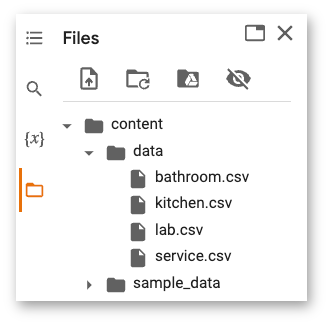

In [ ]:
ls ./data

bathroom.csv  kitchen.csv  lab.csv  service.csv


In [ ]:
bath = load_data('bathroom')
kit = load_data('kitchen')
lab = load_data('lab')
serv = load_data('service')

bathroom - Shape: (728, 9)
kitchen - Shape: (770, 9)
lab - Shape: (719, 9)
service - Shape: (765, 9)


### Bathroom data

In [ ]:
print(bath.head())

   count    pres   temp  humi    voc   red  green  blue   ir
0      0  897.16  28.04  30.8  30211   936    981   344  134
1      1  897.14  28.05  31.5  30159  1034   1002   280   72
2      2  897.18  27.99  31.1  30182   966    950   266   68
3      3  897.09  27.98  31.0  30203   949    985   347  135
4      4  897.16  28.02  31.0  30202   958    964   332  127


In [ ]:
bath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   728 non-null    int64  
 1   pres    728 non-null    float64
 2   temp    728 non-null    float64
 3   humi    728 non-null    float64
 4   voc     728 non-null    int64  
 5   red     728 non-null    int64  
 6   green   728 non-null    int64  
 7   blue    728 non-null    int64  
 8   ir      728 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 51.3 KB


In [ ]:
bath.describe()

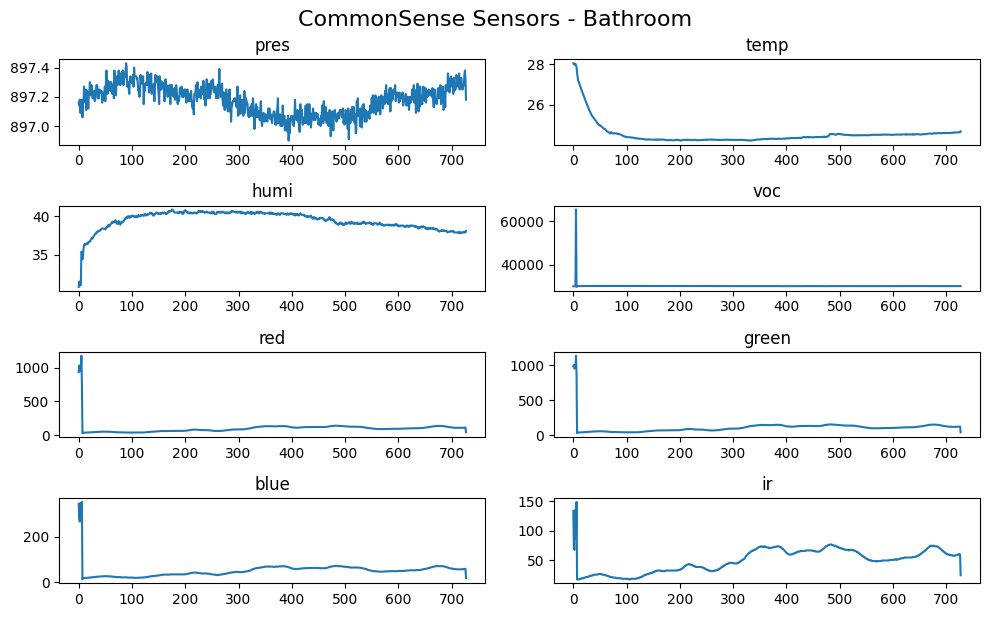

In [ ]:
plot_data(bath, "Bathroom")

Analise the first 30 datapoints

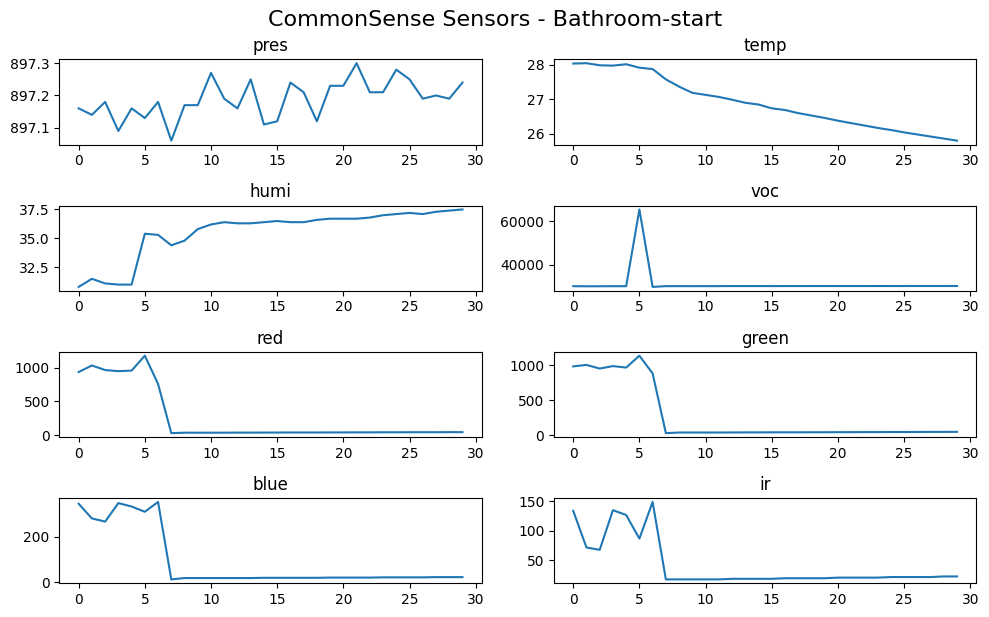

In [ ]:
plot_data(bath[:30], "Bathroom-start")

There are some instable data before the 1oth datapoint, so, let's delete them

In [ ]:
bath = bath[10:]
bath.shape

(718, 9)

Check the cleaned data

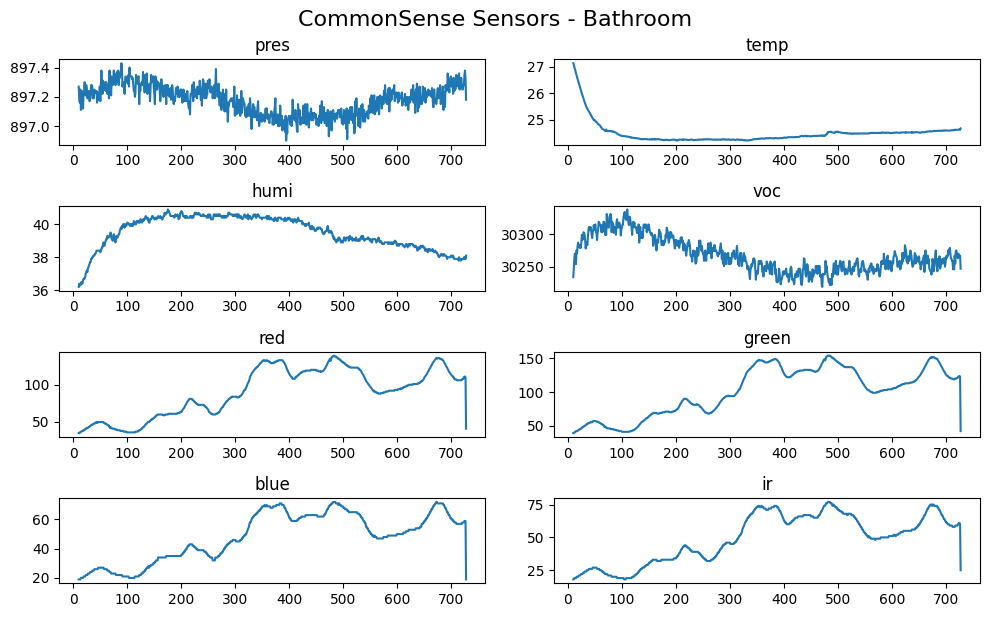

In [19]:
plot_data(bath, "Bathroom")

### Kitchen Data

In [21]:
kit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   770 non-null    int64  
 1   pres    770 non-null    float64
 2   temp    770 non-null    float64
 3   humi    770 non-null    float64
 4   voc     770 non-null    int64  
 5   red     770 non-null    int64  
 6   green   770 non-null    int64  
 7   blue    770 non-null    int64  
 8   ir      770 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.3 KB


In [22]:
kit.describe()

,count,pres,temp,humi,voc,red,green,blue,ir
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,384.500000,897.561312,27.507091,30.910649,30520.423377,23.853247,24.140260,10.205195,19.201299
std,222.424144,0.195358,0.472399,1.308417,1265.429446,18.484184,22.161391,8.864210,8.010218
min,0.000000,897.170000,23.730000,30.200000,29763.000000,5.000000,4.000000,1.000000,4.000000
25%,192.250000,897.412500,27.452500,30.400000,30434.000000,12.000000,12.000000,5.000000,11.000000
50%,384.500000,897.560000,27.635000,30.600000,30454.000000,23.000000,23.000000,10.000000,20.000000
75%,576.750000,897.730000,27.720000,31.000000,30507.000000,29.000000,29.000000,13.000000,26.000000
max,769.000000,897.970000,27.850000,44.800000,65530.000000,158.000000,185.000000,91.000000,103.000000


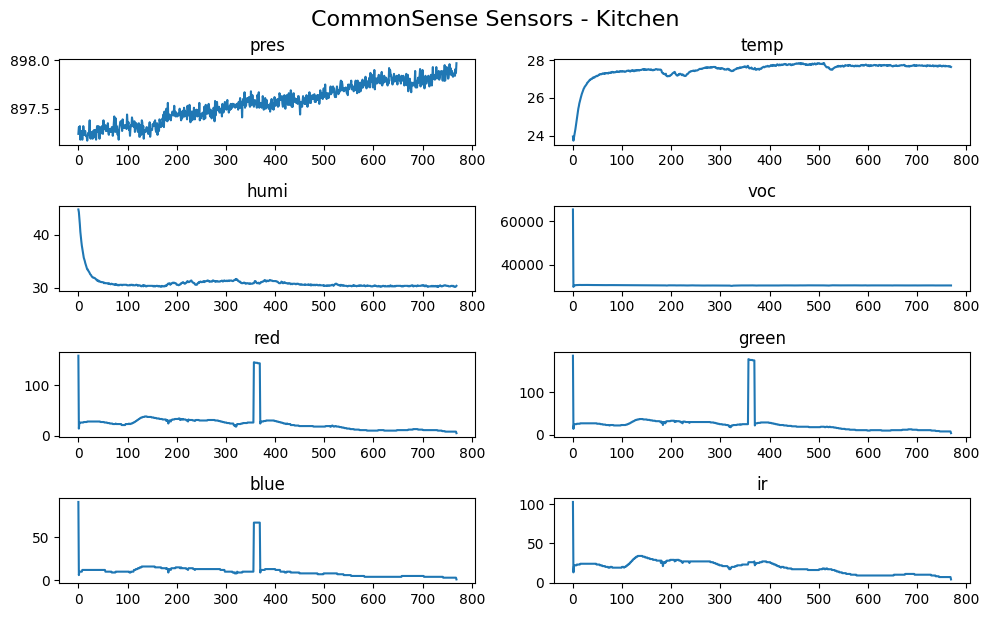

In [23]:
plot_data(kit, "Kitchen")

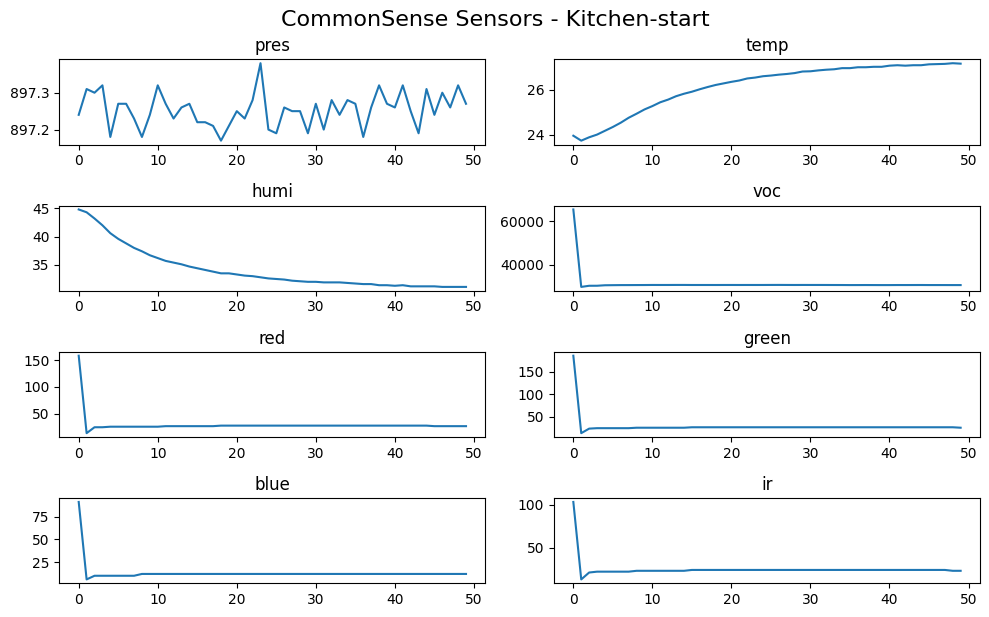

In [24]:
plot_data(kit[:50], "Kitchen-start")

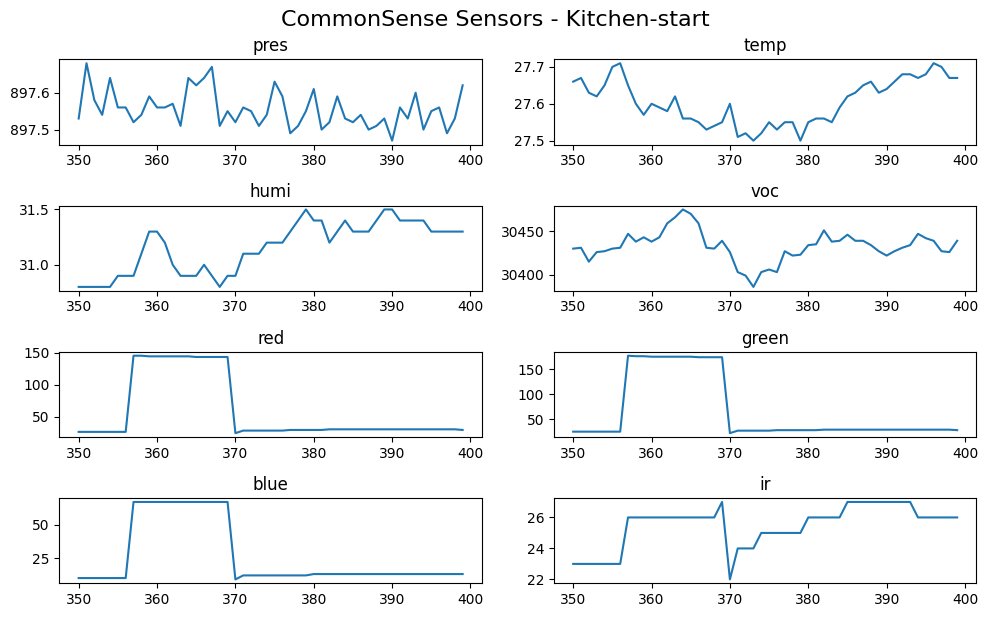

In [25]:
plot_data(kit[350:400], "Kitchen-start")

Seems that an artificial light was turned on the kitchen around data #360. We will keep the data, as it, only deleting the initial 10 points (sensor stabilization).

(760, 9)


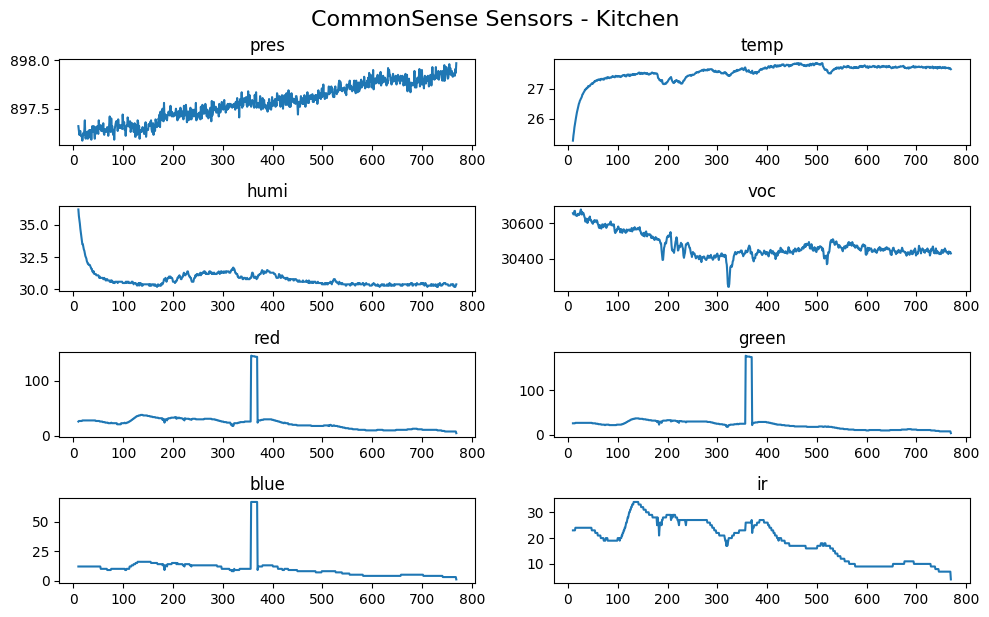

In [26]:
kit = kit[10:]
print(kit.shape)
plot_data(kit, "Kitchen")

### Lab data

In [27]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   719 non-null    int64  
 1   pres    719 non-null    float64
 2   temp    719 non-null    float64
 3   humi    719 non-null    float64
 4   voc     719 non-null    int64  
 5   red     719 non-null    int64  
 6   green   719 non-null    int64  
 7   blue    719 non-null    int64  
 8   ir      719 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 50.7 KB


In [28]:
lab.describe()

,count,pres,temp,humi,voc,red,green,blue,ir
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,359.000000,896.511307,27.869346,31.084284,30158.031989,860.682893,874.632823,273.812239,84.198887
std,207.701709,0.408367,0.099692,0.293505,28.082605,42.752669,57.391888,35.265757,24.168990
min,0.000000,895.850000,27.660000,30.500000,30066.000000,774.000000,759.000000,203.000000,31.000000
25%,179.500000,896.120000,27.790000,30.900000,30139.000000,839.000000,844.000000,254.500000,73.000000
50%,359.000000,896.420000,27.870000,31.000000,30158.000000,859.000000,872.000000,272.000000,85.000000
75%,538.500000,896.930000,27.940000,31.200000,30182.000000,887.000000,912.000000,299.500000,99.000000
max,718.000000,897.260000,28.120000,31.900000,30215.000000,959.000000,1004.000000,354.000000,140.000000


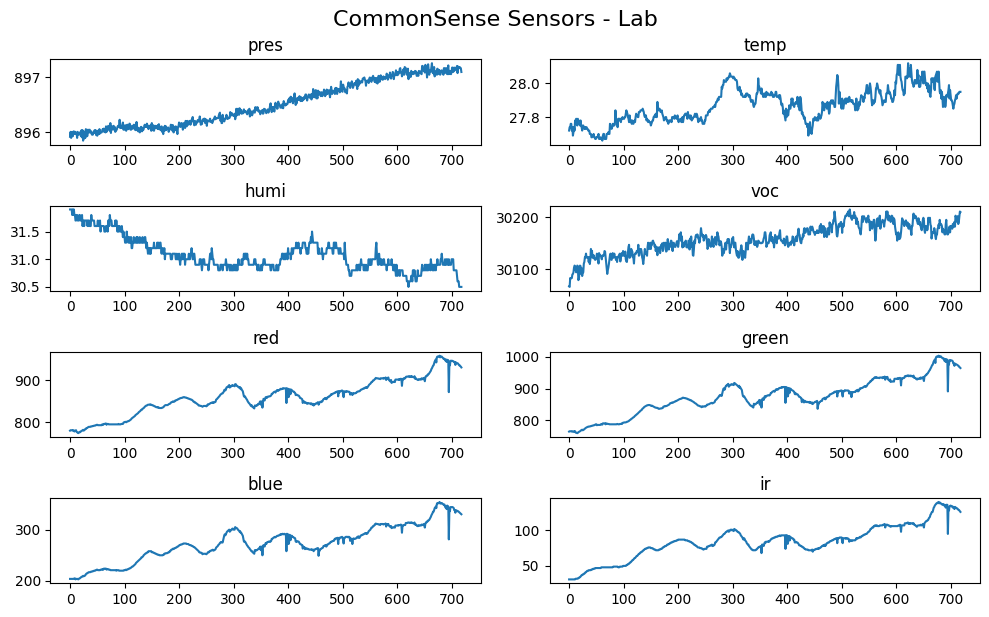

In [29]:
plot_data(lab, "Lab")

In the case of Laboratory, was not necessary to delete initial data, once the sensors were alheady stabilezed.

### Service data

In [30]:
serv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   765 non-null    int64  
 1   pres    765 non-null    float64
 2   temp    765 non-null    float64
 3   humi    765 non-null    float64
 4   voc     765 non-null    int64  
 5   red     765 non-null    int64  
 6   green   765 non-null    int64  
 7   blue    765 non-null    int64  
 8   ir      765 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 53.9 KB


In [31]:
serv.describe()

,count,pres,temp,humi,voc,red,green,blue,ir
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,382.000000,897.935438,21.627412,33.976209,32020.064052,456.028758,493.610458,259.477124,305.458824
std,220.980768,0.065144,0.519962,0.629829,1227.212523,240.911259,258.872151,137.833446,172.009984
min,0.000000,897.740000,21.020000,32.000000,30423.000000,118.000000,125.000000,62.000000,74.000000
25%,191.000000,897.890000,21.200000,33.600000,31842.000000,210.000000,224.000000,112.000000,138.000000
50%,382.000000,897.940000,21.580000,34.100000,32030.000000,456.000000,515.000000,294.000000,282.000000
75%,573.000000,897.980000,21.890000,34.500000,32134.000000,658.000000,702.000000,369.000000,462.000000
max,764.000000,898.120000,24.330000,38.900000,65530.000000,933.000000,991.000000,512.000000,663.000000


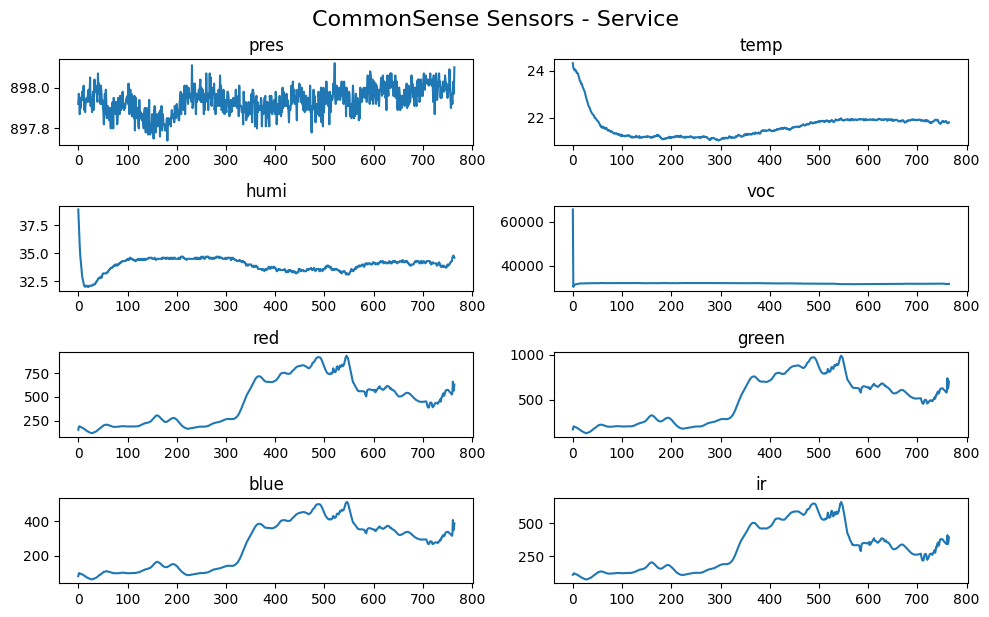

In [32]:
plot_data(serv, "Service")

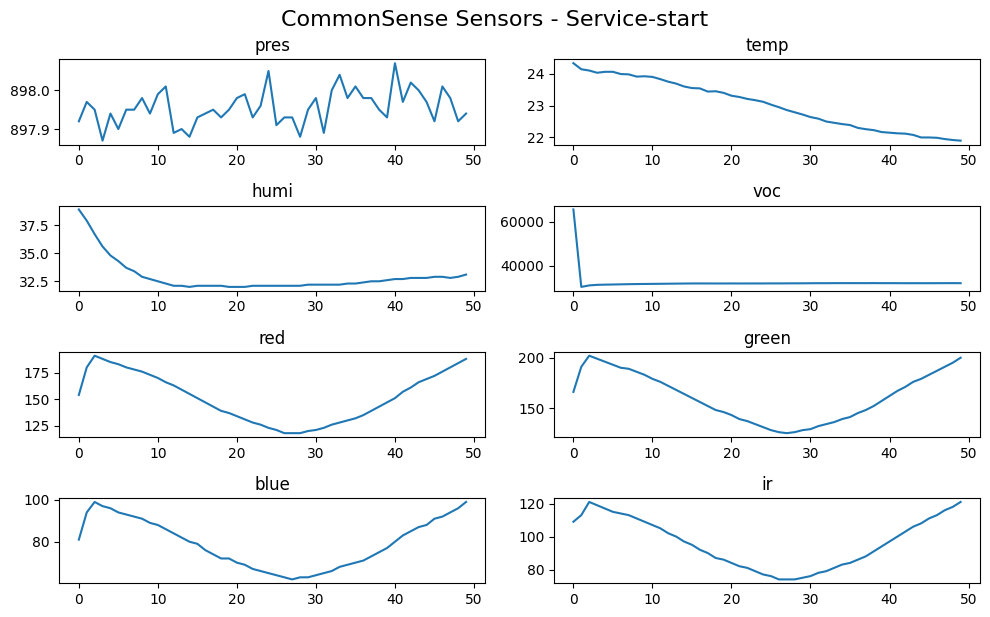

In [33]:
plot_data(serv[:50], "Service-start")

(755, 9)


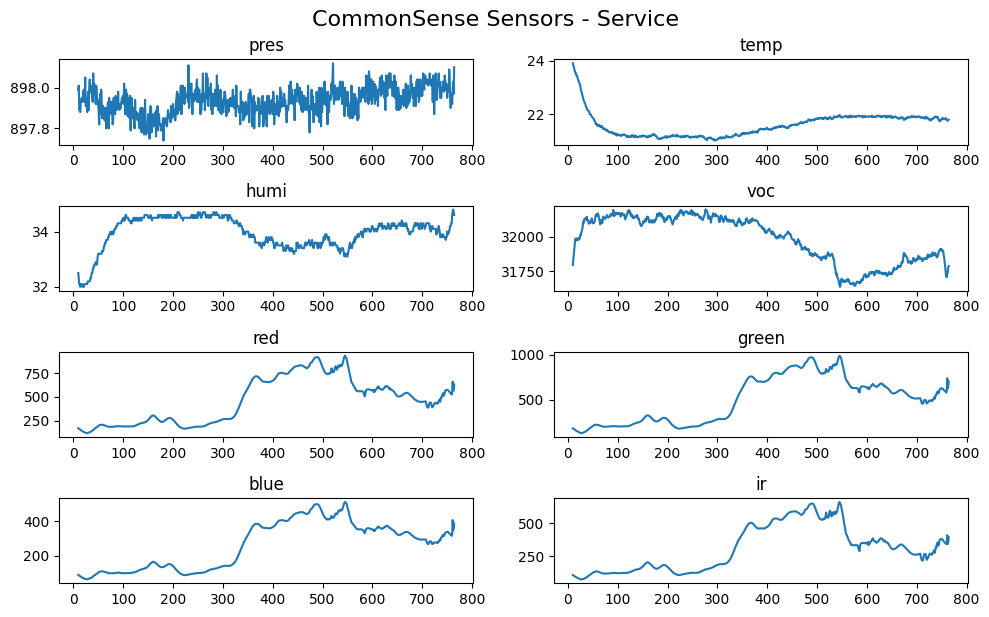

In [34]:
serv = serv[10:]
print(serv.shape)
plot_data(serv, "Service")

### Spliting data

We shouls split data in train and test on this early stage, because we should later, apply the standariztion or normaliztion to test data with the train data parameters

For start, let's create a new column with the correspondent label

In [35]:
kit['class']='kit'
bath['class']='bath'
lab['class']='lab'
serv['class']='serv'

In [36]:
kit.head(2)

,count,pres,temp,humi,voc,red,green,blue,ir,class
10,10,897.32,25.27,36.2,30658,26,26,12,23,kit
11,11,897.27,25.44,35.7,30651,27,26,12,23,kit


We will put apart 100 data points from each dataset, to be used later for testing

In [37]:
kit_train = kit[:-100]
kit_test = kit[-100:]
kit_train.shape, kit_test.shape

((660, 10), (100, 10))

In [38]:
bath_train = bath[:-100]
bath_test = bath[-100:]
bath_train.shape, bath_test.shape

((618, 10), (100, 10))

In [39]:
lab_train = lab[:-100]
lab_test = lab[-100:]
lab_train.shape, lab_test.shape

((619, 10), (100, 10))

In [40]:
serv_train = serv[:-100]
serv_test = serv[-100:]
serv_train.shape, serv_test.shape

((655, 10), (100, 10))

## Creating single train and test datasets

In [41]:
# training
df_train = pd.concat([kit_train, bath_train], ignore_index=True)
df_train = pd.concat([df_train, lab_train], ignore_index=True)
df_train = pd.concat([df_train, serv_train], ignore_index=True)
df_train.shape

(2552, 10)

In [42]:
# training
df_test = pd.concat([kit_test, bath_test], ignore_index=True)
df_test = pd.concat([df_test, lab_test], ignore_index=True)
df_test = pd.concat([df_test, serv_test], ignore_index=True)
df_test.shape

(400, 10)

In [43]:
df_test.tail()

,count,pres,temp,humi,voc,red,green,blue,ir,class
395,760,897.92,21.78,34.6,31706,547,598,323,356,serv
396,761,897.99,21.77,34.7,31739,660,739,407,410,serv
397,762,898.03,21.76,34.8,31739,561,624,347,343,serv
398,763,897.97,21.79,34.7,31778,581,646,358,358,serv
399,764,898.10,21.80,34.6,31787,630,701,387,394,serv


In [44]:
del df_train['count']
del df_test['count']

In [45]:
df_train.head(2)

,pres,temp,humi,voc,red,green,blue,ir,class
0,897.32,25.27,36.2,30658,26,26,12,23,kit
1,897.27,25.44,35.7,30651,27,26,12,23,kit


Let's now analize the features.

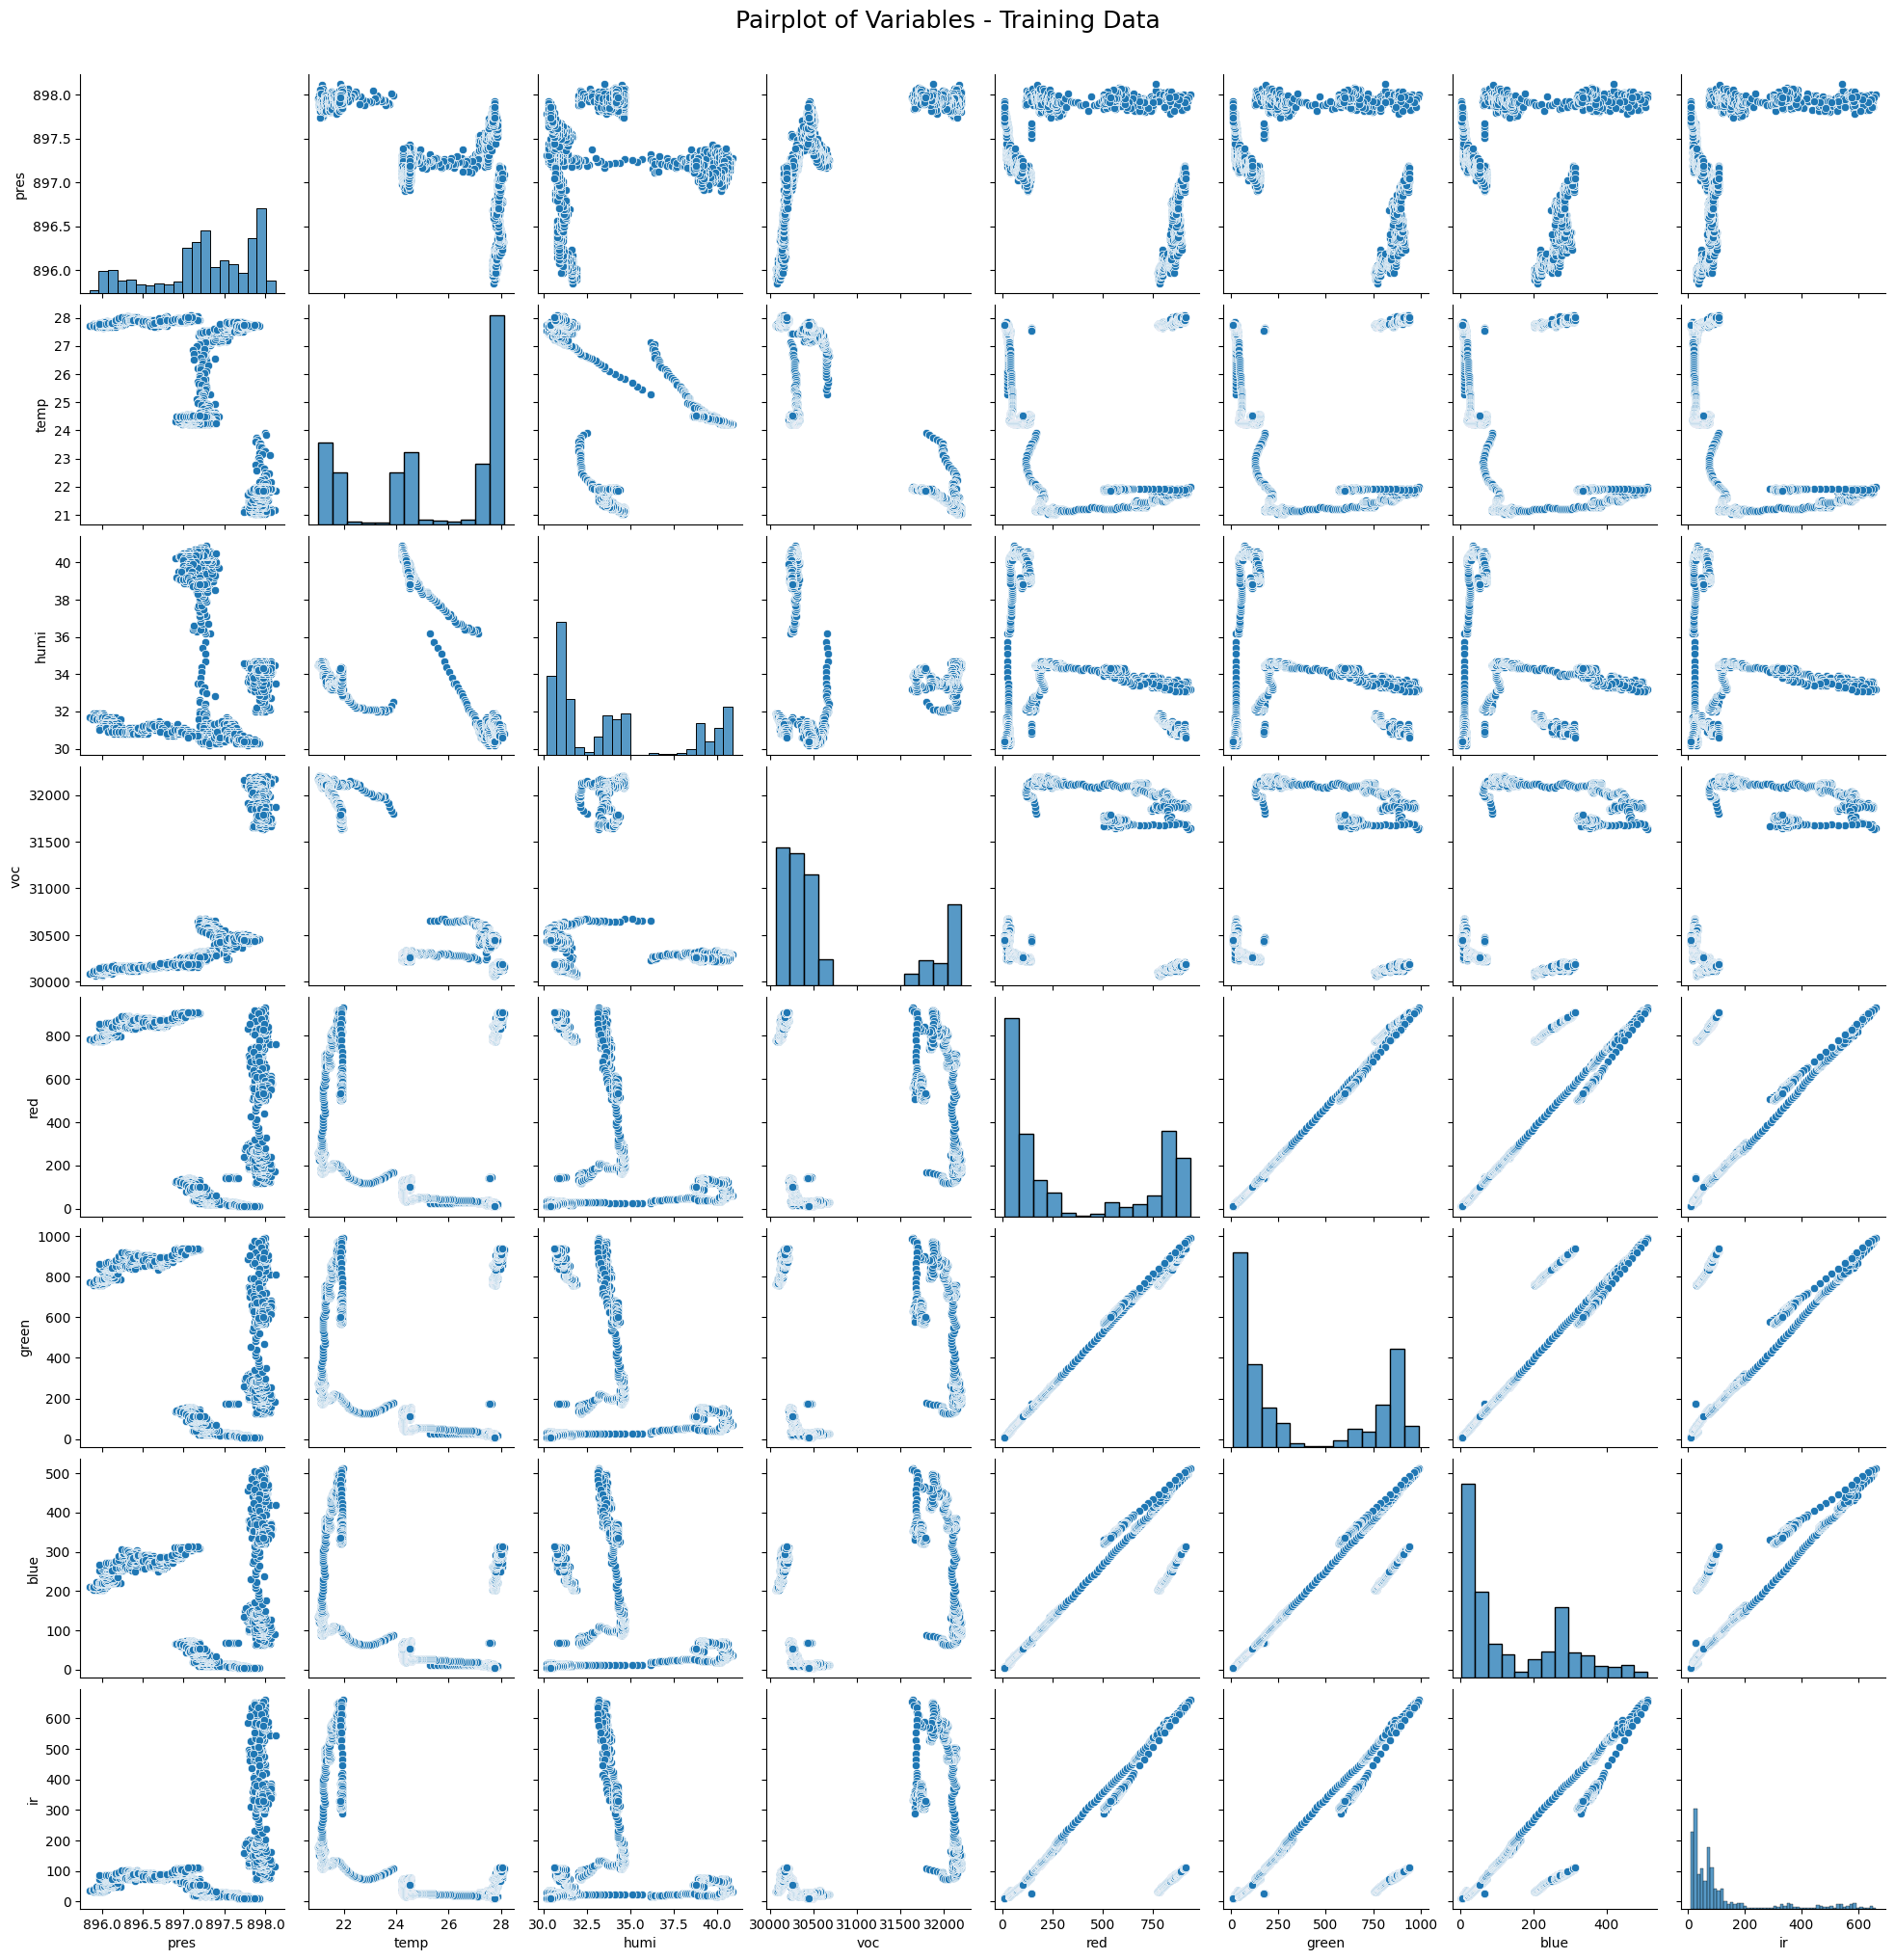

In [46]:
plot_pairplot(df_train, 'Training Data')

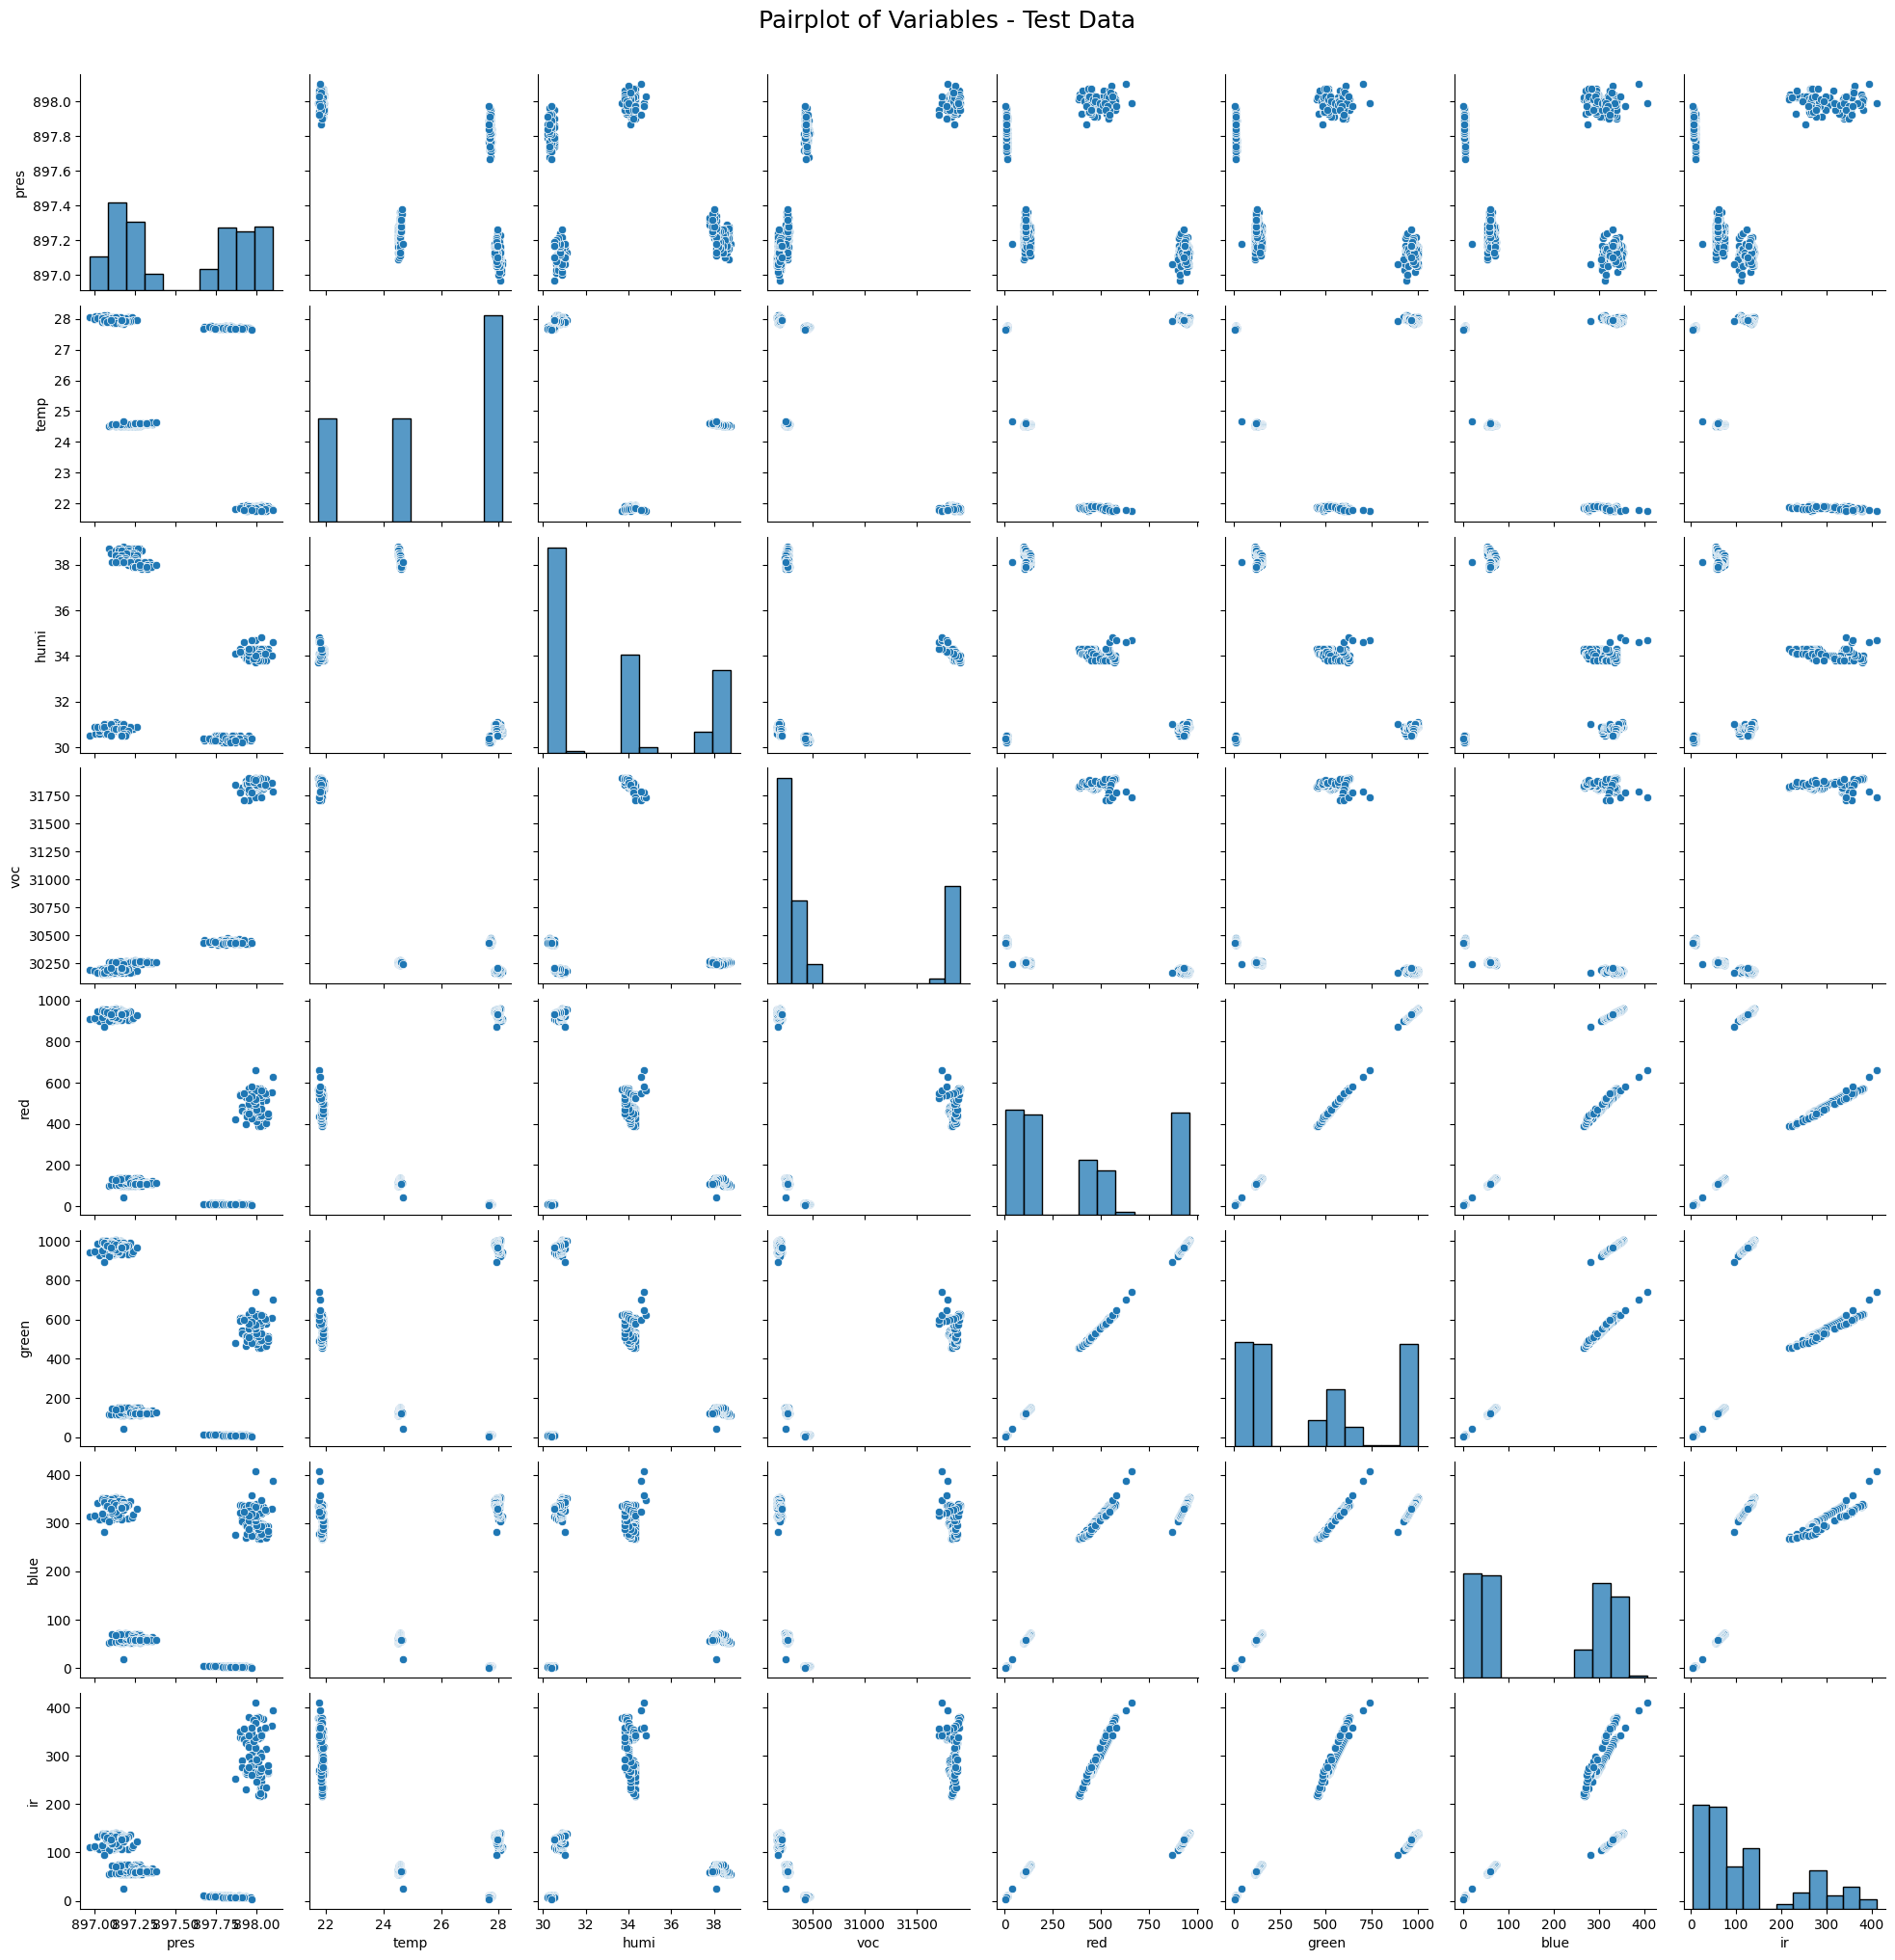

In [47]:
plot_pairplot(df_test, 'Test Data')

Looking for the sales on the left, we can see that each sensor data ranges on very different scales. So, we need standarize or normalize each one of the numerical columns.

But what technic should we use? Looking the diagonal, is possible to see that data disbrution for each sensor data not follow a normal distribution, so, Normalization should be the best option in this case.

Also, it is clear that the data related tho the light sensors (red, green, blue and ir) have an important correlation (plot appears as a diagonal). This means that only one of those features should be used (or a combination of them). Leaving them separated will not damage the model, only will make it a little bit bigger. But as we the model is small, we will leave those features as it.

## Normalizing Data

In [48]:
scaled_train_df, df_mins, df_ranges = normalize_train_data(df_train)

In [51]:
scaled_train_df

,pres,temp,humi,voc,red,green,blue,ir,class
0,0.647577,0.599436,0.560748,0.277543,0.017335,0.016310,0.015748,0.021407,kit
1,0.625551,0.623413,0.514019,0.274262,0.018418,0.016310,0.015748,0.021407,kit
2,0.607930,0.640339,0.485981,0.276137,0.018418,0.016310,0.015748,0.021407,kit
3,0.621145,0.661495,0.457944,0.283169,0.018418,0.016310,0.015748,0.021407,kit
4,0.625551,0.677010,0.420561,0.283638,0.018418,0.016310,0.015748,0.021407,kit
...,...,...,...,...,...,...,...,...,...
2547,0.920705,0.119887,0.383178,0.797000,0.550379,0.584098,0.635827,0.470948,serv
2548,0.916300,0.119887,0.373832,0.799344,0.554713,0.589195,0.639764,0.477064,serv
2549,0.942731,0.117066,0.373832,0.808720,0.560130,0.593272,0.643701,0.481651,serv
2550,0.907489,0.115656,0.373832,0.802625,0.564464,0.597350,0.647638,0.487768,serv


We should apply the normalization to the numerical features of the training data, saving as a list, the `mins` and `rages` found for each column. Those values should be applyed to the test dataset. Remember that the test dataset should be a new data for the model, simulation "real data". So, we do not know thos data during training.

In [49]:
scaled_test_df = normalize_test_data(df_test, df_mins, df_ranges)

In [50]:
scaled_test_df

,pres,temp,humi,voc,red,green,blue,ir,class
0,0.881057,0.947814,0.018692,0.178153,0.001083,0.002039,0.001969,0.001529,kit
1,0.806167,0.947814,0.009346,0.186123,0.002167,0.002039,0.001969,0.001529,kit
2,0.845815,0.949224,0.018692,0.182372,0.002167,0.002039,0.001969,0.001529,kit
3,0.823789,0.950635,0.018692,0.176278,0.002167,0.002039,0.001969,0.001529,kit
4,0.863436,0.950635,0.009346,0.176746,0.002167,0.002039,0.001969,0.001529,kit
...,...,...,...,...,...,...,...,...,...
395,0.911894,0.107193,0.411215,0.768870,0.581798,0.599388,0.627953,0.530581,serv
396,0.942731,0.105783,0.420561,0.784341,0.704225,0.743119,0.793307,0.613150,serv
397,0.960352,0.104372,0.429907,0.784341,0.596966,0.625892,0.675197,0.510703,serv
398,0.933921,0.108604,0.420561,0.802625,0.618635,0.648318,0.696850,0.533639,serv


## Saving Datasets

Now, save the normalized train and test data to your computer:
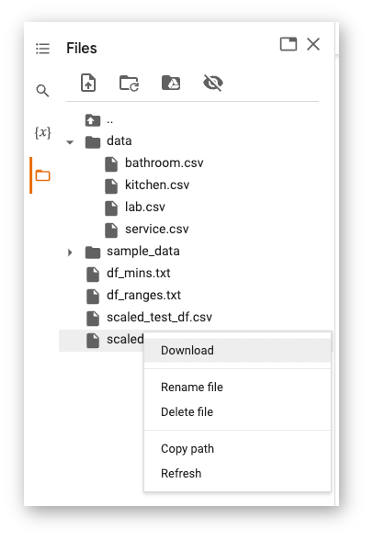

In [53]:
scaled_train_df.to_csv("scaled_train_df.csv", index=False)
scaled_test_df.to_csv("scaled_test_df.csv", index=False)

In [55]:
df_mins

[895.85, 21.02, 30.2, 30066, 10, 10, 4, 9]

In [56]:
with open("df_mins.txt", "w") as f:
    for s in df_mins:
        f.write(str(s) +"\n")

In [57]:
df_ranges

[2.269999999999982, 7.09, 10.7, 2133, 923, 981, 508, 654]

In [58]:
with open("df_ranges.txt", "w") as f:
    for s in df_ranges:
        f.write(str(s) +"\n")